In [1]:
import pandas as pd

In [22]:
home_listings = pd.read_csv('../data/home-listings-example.csv')

Let's focus on 
* BathsTotal
* BedsTotal
* CDOM (Cumulative Days on Market)
* LotSizeAreaSQFT
* SqFtTotal
* ElementarySchoolName

And the target column, ClosePrice

In [8]:
columns = [
'BathsTotal',
'BedsTotal',
'CDOM',
'LotSizeAreaSQFT',
'SqFtTotal',
'ElementarySchoolName',
'ClosePrice'
]

In [23]:
home_listings_subset = home_listings[columns]

In [24]:
home_listings_subset.describe()

,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ClosePrice
count,653.000000,653.000000,653.000000,652.000000,653.000000,2.230000e+02
mean,3.055896,3.894334,98.110260,8039.425583,3186.044410,4.273260e+05
std,1.027811,0.843333,113.590604,5508.539660,1290.991135,1.973822e+05
min,1.000000,1.000000,-62.000000,0.000000,850.000000,1.850000e+05
25%,2.100000,3.000000,18.000000,5662.800000,2165.000000,3.000000e+05
50%,3.000000,4.000000,62.000000,7405.200000,3007.000000,3.730000e+05
75%,4.000000,5.000000,138.000000,9147.600000,3931.000000,4.805000e+05
max,7.100000,6.000000,862.000000,65383.560000,9222.000000,1.622500e+06


In [25]:
# How many rows are null for each column?
home_listings_subset.isna().sum(0) / len(home_listings_subset)

BathsTotal              0.000000
BedsTotal               0.000000
CDOM                    0.000000
LotSizeAreaSQFT         0.001531
SqFtTotal               0.000000
ElementarySchoolName    0.000000
ClosePrice              0.658499
dtype: float64

There are lots of nulls on the target column, those will not be useful for training so they can be discarded

In [26]:
home_listings_subset = home_listings_subset.dropna(subset=['ClosePrice'])


In [28]:
home_listings_subset.head()

,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ClosePrice
430,3.0,4,52,7100.28,2484,Allen,485000.0
431,2.1,4,58,8712.00,2631,Fisher,330000.0
432,1.1,1,38,1306.80,884,Bright,185000.0
433,2.0,3,11,6969.60,1451,Shawnee,210000.0
434,2.0,3,89,6098.40,1559,Bright,225000.0


In [73]:
home_listings_subset.dtypes

BathsTotal              float64
BedsTotal                 int64
CDOM                      int64
LotSizeAreaSQFT         float64
SqFtTotal                 int64
ElementarySchoolName     object
ClosePrice              float64
dtype: object

In [30]:
# Baths total seems to be a floating number, but it probably should be treated as a categorical variable, since it can only take on a few values.
home_listings_subset.BathsTotal.value_counts()

2.0    56
2.1    43
3.1    35
3.0    30
4.1    23
4.0    17
4.2     7
3.2     4
5.0     2
5.2     2
5.1     2
1.1     1
2.2     1
Name: BathsTotal, dtype: int64

In [33]:
import numpy as np
import matplotlib.pyplot as plt

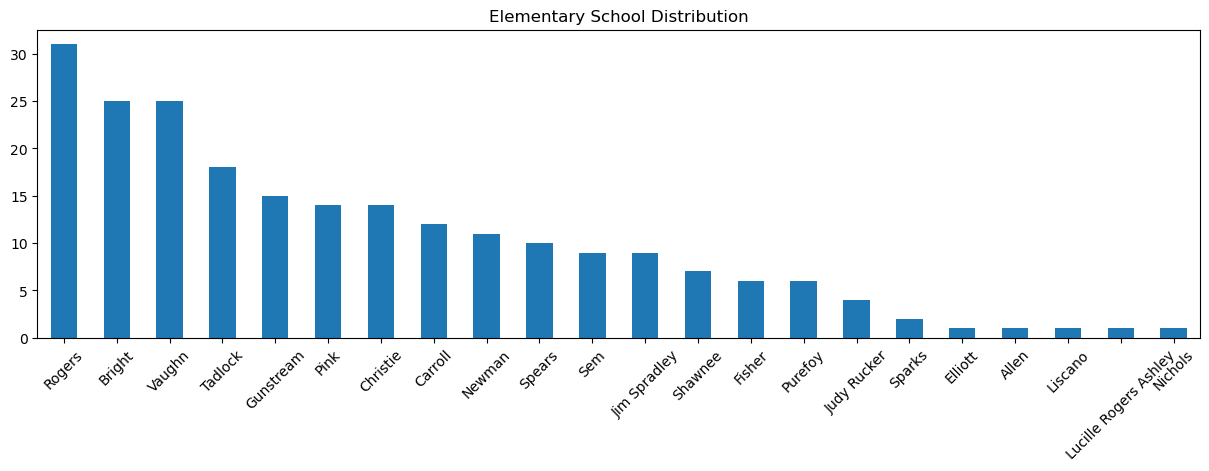

In [37]:
plt.figure(figsize=(15,4))
plt.title('Elementary School Distribution')
home_listings_subset.ElementarySchoolName.value_counts().plot.bar()
plt.xticks(rotation=45);

How is the relationship between SqFeetTotal and Price?

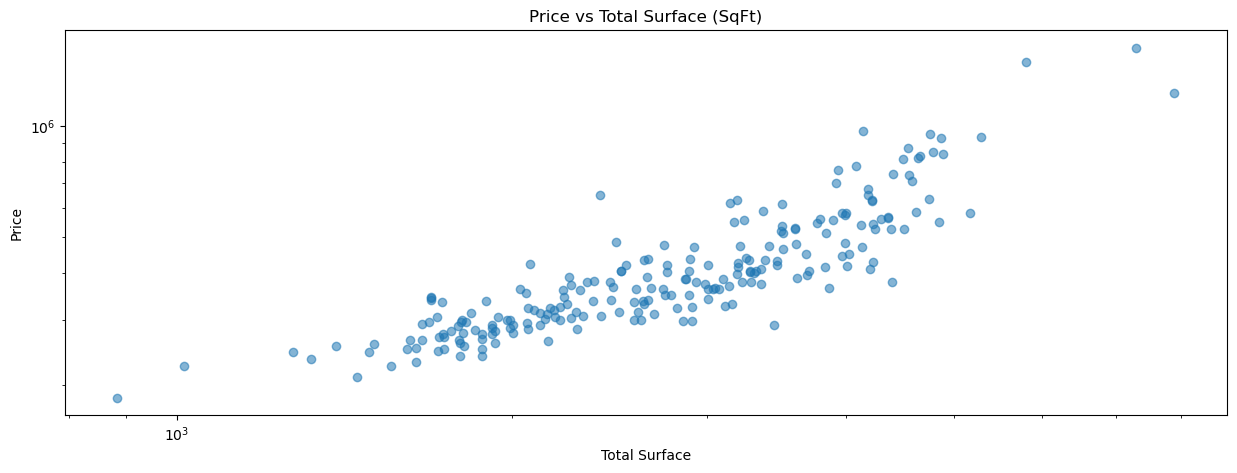

In [44]:
plt.figure(figsize=(15,5))
plt.scatter(home_listings_subset.SqFtTotal, home_listings_subset.ClosePrice, alpha=0.55)
plt.title('Price vs Total Surface (SqFt)')
plt.xlabel('Total Surface')
plt.ylabel('Price')
plt.xscale('log')
plt.yscale('log')

Are there any other columns that might be worth looking at?

In [49]:
for col in home_listings.columns:
    nulls = home_listings[col].isna().sum()
    # Let's filter those with more tan 20% of nulls
    if nulls / len(home_listings) <= 0.2:
        print(col, nulls)

AppointmentCall 117
AppointmentPhone 120
BathsFull 0
BathsHalf 0
BathsTotal 0
BedsTotal 0
Block 53
BuyersAgencyCommission 0
CDOM 0
City 0
ConstructionMaterials 1
YearBuiltDetails 0
Country 12
CountyOrParish 0
CurrentPrice 0
DOM 0
ElementarySchoolName 0
ExteriorFeatures 87
FireplaceFeatures 57
FireplacesTotal 1
Flooring 0
FoundationDetails 0
GarageLength 8
GarageWidth 8
HandicapYN 1
Heating 1
HighSchoolName 0
AssociationType 1
AssociationFeeFrequency 68
AssociationFee 68
AssociationFeeIncludes 67
HOAManagementCompany 71
HOAManagementCompanyPhone 69
StructuralStyle 0
KeyboxNumber 23
KeyBoxType 1
OtherEquipment 0
ListAgentDirectWorkPhone 7
ListAgentFullName 0
ListAgentMLSID 0
ListOfficeMLSID 0
ListOfficeName 0
ListOfficePhone 2
ListPrice 0
ListingAgreement 0
ListingContractDate 0
LoanType 1
LotFeatures 70
LotSizeArea 1
LotSizeAreaSQFT 1
LotSizeUnits 0
LotSize 1
MiddleSchoolName 1
MLSAreaMajor 0
MLSNumber 0
MLSAreaMinor 0
MunicipalUtilityDistrictYN 1
NumberOfDiningAreas 0
NumberOfLivingAre

In [51]:
home_listings.Country.value_counts() #Country would be important if the data was not from the US, but it is, so we can ignore it.

United States    641
Name: Country, dtype: int64

In [53]:
home_listings.StructuralStyle.value_counts()
# Structural style could be a nice feature to add

Single Detached                                            573
Condo/Townhome                                              63
Garden/Zero Lot Line, Single Detached                        6
Attached or 1/2 Duplex                                       4
Attached or 1/2 Duplex, Condo/Townhome, Single Detached      1
Singlewide Mobile w/Land                                     1
Doublewide Mobile w/Land                                     1
Single Detached, Vacation Home                               1
Farm/Ranch House                                             1
Attached or 1/2 Duplex, Single Detached                      1
Historical/Conservation Dist., Single Detached               1
Name: StructuralStyle, dtype: int64

In [74]:
columns.append('StructuralStyle')

In [76]:
home_listings_subset.to_csv('../data/home-listings-subset.csv', index=False) # Let's save the subset for training